Gestion des IDs de Intact
Travail sur un subset (head 200)
> /home/lbarlet/WorkOnIntact/subset_intact.txt

split pour récup deux première colonnes 
ensuite trie pour savoir quelle ID est la plus présentes,
la seconde, ...

/!\ la deuxième ne doit pas présenter la première, etc /!\


In [1]:
import sys
import os
import subprocess
sys.path.append('/Users/mbachir/dev/pyproteins/src/')
sys.path.append('/Users/mbachir/dev/pyproteinsExt/src/')
sys.path.append('/Users/mbachir/omegalomo/omegaLoMo/lib')
%load_ext autoreload

In [2]:
import pyproteins.homology.core_adjacence as ca
from collections import Counter
#import pyproteins.omegaLoMo.core as om
from collections import defaultdict
import fnmatch
import networkx as nx
import matplotlib.pyplot as plt
import copy
import collections
import numpy as np
import operator
%autoreload 2

In [3]:
%autoreload 2

col1 = []
col2 = []
#/Volumes/arwen/mobi/group/divisome/physical_intact.mitab.txt 
#/Volumes/arwen/home/lbarlet/WorkOnIntact/subset_intact.txt

for line in open("/Volumes/arwen/mobi/group/divisome/physical_intact.mitab.txt"):
    sLine = line.split('\t')
    idOne = sLine[0]
    idTwo = sLine[1]
    idOne = idOne.split(':')
    idTwo = idTwo.split(':')
    if idOne[0] == "uniprotkb" and idTwo[0] == "uniprotkb":
        col1.append(idOne[1]) 
        #print idOne[1], idTwo[1]
        col2.append(idTwo[1]) 



In [4]:
def merge_two_dicts(x, y):
    """Given two dicts, merge them into a new dict as a shallow copy."""
    z = x.copy()
    z.update(y)
    return z
    

In [5]:
%autoreload 2

CountIdOne = Counter(col1)
CountIdTwo = Counter(col2)
mergeIds = merge_two_dicts(CountIdOne, CountIdTwo)

sortedByOccurencesDic = sorted(mergeIds.items(), key=operator.itemgetter(1), reverse=True)
print sortedByOccurencesDic
#print sortedByOccurences[0] --->('Q9A8N4', 16)
sortedByOccurences = [x[0] for x in sortedByOccurencesDic]
#print "-------------------------------------"
print sortedByOccurences

[('A4D127', 1607), ('P60410', 1180), ('Q6A162', 1169), ('Q7Z3S9', 1163), ('B8A4K4', 1152), ('Q99750', 1148), ('Q15323', 1094), ('Q8TBB1', 1024), ('P14373', 984), ('Q12933', 918), ('O00560', 906), ('Q96HA8', 810), ('Q08379', 798), ('Q8NHQ1', 741), ('P60411', 725), ('Q9UJV3-2', 709), ('A0A0C4DGS5', 708), ('Q13077', 699), ('A0A0G2JQ02', 698), ('Q9BRK4', 692), ('P49639', 677), ('Q9NRD5', 677), ('P62993', 669), ('P60409', 645), ('Q8N6Y0', 640), ('P26371', 637), ('Q9UBB9', 632), ('Q02159', 607), ('O43765', 575), ('Q9BYV2', 560), ('O75031', 556), ('Q5S007', 554), ('P36406', 524), ('Q04864', 523), ('Q5JR59-3', 521), ('O76011', 514), ('Q6UY14-3', 509), ('P08238', 505), ('Q8ND90', 497), ('Q8N6L0', 494), ('Q15038', 491), ('Q03862', 490), ('P19012', 490), ('Q5JR59', 489), ('Q13137', 487), ('P54253', 485), ('O14964', 483), ('Q9UHD9', 483), ('Q9UMX0', 478), ('Q93062', 478), ('P00533', 476), ('Q9UKT9', 476), ('Q08117-2', 475), ('Q9Y4K3', 471), ('Q49A26-4', 470), ('Q96BA8', 456), ('Q13895', 445), ('P3

In [6]:
dico = {}

colOne = list(col1)
colTwo = list(col2)

while len(colOne) > 0:
    for ids in sortedByOccurences:
        
        #print ids
        intercatWith = []
        toRemove = []
        i=0
        
        while i < len(colOne):

            if colOne[i] == ids:
                intercatWith.append(colTwo[i])
                toRemove.append(i)
            elif colTwo[i] == ids:
                intercatWith.append(colOne[i])
                toRemove.append(i)

            i+=1
            
            if intercatWith:
                dico.update({ids : intercatWith})
        
            
        for toDel in sorted(toRemove, reverse=True):
            del colOne[toDel]
            del colTwo[toDel]



In [7]:
allIdInR6 = []
for line in open("/Volumes/arwen/mobi/group/divisome/anaBlast/allInR6OnlyIn"):
    if ":" not in line and line != "\n":
        allIdInR6.append(line[:-1])


In [8]:
#outGoing = []

oldDic = dico.copy()
tryId = ""

for tryId in sortedByOccurences:
    if tryId not in allIdInR6:
        #outGoing.append(tryId)
        oldDic.pop(tryId, None)
        oldDic = {k: [e for e in v if e != tryId] for k, v in oldDic.iteritems()}

newDic = dict((k, v) for k, v in oldDic.iteritems() if v)


In [9]:
#print dico
#print"--------------------------------------"
#print outGoing
#print"--------------------------------------"
print newDic


{'P37647': ['P17109', 'P37647', 'P37647'], 'P16378-2': ['Q9VJX7', 'Q9V3I2', 'P13054'], 'P20936': ['P17544', 'Q5NEE2', 'Q92574', 'P01112'], 'Q0P8W4': ['Q0P8W4'], 'Q0P8W6': ['Q9PNX5', 'Q0PB17', 'Q0PAI0', 'Q9PMS6', 'Q9PIE4', 'Q0P8S7', 'Q0PBK6', 'Q0PBL7', 'Q46125', 'Q0PAB9', 'Q0P9N4', 'Q9PMS6', 'Q0PAS2', 'Q0P891'], 'Q0P8W3': ['O69294', 'Q0PB44', 'Q0P8W3', 'Q0PB44', 'Q0PC70', 'Q0P8W3'], 'P40797': ['Q7KJV6', 'P40797'], 'P40792': ['Q24190', 'Q8MSP7', 'Q9VEV1', 'Q9VCU9', 'X2JDH0', 'Q9VSL8', 'Q95UN8', 'A1Z7T1', 'Q9VIS1', 'Q9VXQ2', 'Q8MQW8', 'Q9VAT0', 'Q7K2X1', 'Q9VXE3', 'Q24213', 'Q24213', 'P48554', 'Q24213'], 'P40793': ['Q9W1B0'], 'P25377': ['P25377'], 'P40798': ['Q9V490', 'Q9VPI4', 'P26308', 'Q9W1X4', 'Q9VDV3', 'Q9V3I9', 'Q94523', 'Q9VN86'], 'P25372': ['O43379', 'O43379', 'O43379'], 'O25053': ['O25392', 'O26092', 'O26092'], 'O25506': ['O25506'], 'Q8NHX9': ['Q8NHX9', 'Q8NHX9', 'Q8NHX9', 'Q8NHX9'], 'Q9VCR2': ['Q9W1U4'], 'Q9TVP3-2': ['A1ZB73'], 'Q03043': ['Q9W3D6'], 'Q00535': ['Q6ZMQ8-1', 'Q9Y2H

In [10]:
sortedIdByInterac = []
for k in sorted(newDic, key=lambda k: len(newDic[k]), reverse=True):
    #with values, tuple    
    #sortedIdByInterac.append((k, len(newDic[k])))
    #without values, list 
    sortedIdByInterac.append(k)
print sortedIdByInterac


['Q15323', 'Q6A162', 'Q8TBB1', 'P14373', 'P08238', 'Q9UBB9', 'Q08379', 'Q5S007', 'A0A0C4DGS5', 'O00560', 'Q8NHQ1', 'Q9BRK4', 'P19012', 'Q13077', 'Q9UJV3-2', 'Q8N6Y0', 'P00533', 'Q9BYV2', 'Q8TD31-3', 'O76011', 'O14964', 'P23508', 'Q5JR59-3', 'P42858', 'P36406', 'Q49A26-4', 'Q13643', 'Q03862', 'O43765', 'Q14164', 'Q5JR59', 'Q9Y6K9', 'Q13137', 'Q3B820', 'Q8IZU0', 'P38340', 'Q9UHD9', 'Q13526', 'P04637', 'Q7Z3Y8', 'Q92624', 'Q15645', 'P60010', 'Q93062', 'P40692', 'O76015', 'P40222', 'Q8N6L0', 'Q00955', 'Q9NRI5', 'Q0PB14', 'Q5JST6', 'A6NEM1', 'Q9H8Y8', 'P68400', 'P06241', 'P10275', 'P61981', 'O43741', 'P0A6F5', 'P10721', 'F5H3M2', 'Q0P9G0', 'Q63ZY3', 'Q08965', 'P38074', 'Q0P9Z0', 'P27986', 'P14618-1', 'Q9UGI0', 'P78362', 'Q53G59', 'O95678', 'Q0P7T9', 'Q6NYC8', 'Q99759', 'P08670', 'Q96BA8', 'P04049', 'Q24564', 'P54646', 'O83954', 'A0A087WUI6', 'P40763', 'O15160', 'Q86YD7', 'Q96CS2', 'A1L4K1', 'Q14145', 'Q0PBB8', 'Q6N4R7', 'P08727', 'Q9Y572', 'Q9BVG8', 'P08581', 'Q15025', 'P78424', 'Q96EQ0', '

In [11]:
allIdleft = set()
for sortId in sortedIdByInterac:
    allIdleft.add(sortId)
    for inId in newDic[sortId]:
        allIdleft.add(inId) 
        
len(allIdleft)
print allIdleft

set(['P37647', 'P37640', 'P30613', 'Q5H9L4', 'Q8ZIL5', 'Q9NQ76', 'Q9NQ75', 'P16378-2', 'O96679', 'P16378-1', 'P39976', 'P20936', 'O24903', 'Q0P8W4', 'Q9VIZ9', 'Q0P8W6', 'A0A0S2Z4U3', 'Q9VWF5', 'P74198', 'Q0P8W3', 'Q81RT0', 'P40797', 'P40792', 'P40793', 'Q81RT7', 'Q72E08', 'P25374', 'P77257', 'Q0P879', 'Q9N4U2', 'P40798', 'P25372', 'O25053', 'P34942', 'Q81L42', 'Q03049', 'P23919', 'Q97RU8', 'Q8NHX9', 'Q06567', 'Q9VCR2', 'Q9TVP3-2', 'Q03043', 'Q72BM6', 'P73313', 'P40616', 'Q9C0H6', 'Q00535', 'Q00534', 'Q00537', 'Q00536', 'Q9C553', 'Q9UMZ2-8', 'P34943', 'O00241', 'Q7KRY7', 'Q72D45', 'Q8IQQ7', 'Q8I5F9', 'Q9UBM7', 'P27619', 'Q81MA4', 'A0AVF1', 'Q9VBR6', 'Q16630-1', 'Q72CS7', 'Q16630-3', 'Q0E8G9', 'P40429', 'Q9LY90', 'Q13838', 'Q23422', 'P94846', 'P94845', 'A6H8Z2', 'P94842', 'P74527', 'O34798', 'P48967', 'Q8L7S4', 'P48960', 'P05382', 'O26778', 'Q8TD31-3', 'P05388', 'Q9QYH1', 'P02765', 'P43509', 'Q1PE09', 'Q9VWL4', 'P34511', 'P73537', 'Q9UJ70', 'Q9UQ03', 'P34042', 'Q8IDR3', 'A0A0C4DGQ7', 'Q7

In [12]:
orderedId = []
for key in allIdleft :
    orderedId.append(key)

keys = {}
matrix = np.zeros((len(orderedId), len(orderedId)))

for key, value in newDic.iteritems():
    indexKey = orderedId.index(key)
    for v in value:
        indexValue = orderedId.index(v)
        if indexKey == indexValue :
            #print orderedId[indexKey], orderedId[indexValue]
            matrix[indexKey, indexValue] +=1
        else :
            matrix[indexKey, indexValue] +=1
            matrix[indexValue, indexKey] +=1
          
        
#rint pd.DataFrame(matrix)


#M = [ [0]*size for i in range(size) ]
#for a,b in [(keys.index(a), keys.index(b)) for a, row in newDic.items() for b in row]:
#     M[a][b] = 2 if (a==b) else 1
        
#print M
#print(np.matrix(M))
orderedId.append('P36111')
print orderedId
#coordonnées non vide
tryme = np.nonzero(matrix)
np.transpose(tryme)

#map le tableau pour rajouter à l'interaction des infos


['P37647', 'P37640', 'P30613', 'Q5H9L4', 'Q8ZIL5', 'Q9NQ76', 'Q9NQ75', 'P16378-2', 'O96679', 'P16378-1', 'P39976', 'P20936', 'O24903', 'Q0P8W4', 'Q9VIZ9', 'Q0P8W6', 'A0A0S2Z4U3', 'Q9VWF5', 'P74198', 'Q0P8W3', 'Q81RT0', 'P40797', 'P40792', 'P40793', 'Q81RT7', 'Q72E08', 'P25374', 'P77257', 'Q0P879', 'Q9N4U2', 'P40798', 'P25372', 'O25053', 'P34942', 'Q81L42', 'Q03049', 'P23919', 'Q97RU8', 'Q8NHX9', 'Q06567', 'Q9VCR2', 'Q9TVP3-2', 'Q03043', 'Q72BM6', 'P73313', 'P40616', 'Q9C0H6', 'Q00535', 'Q00534', 'Q00537', 'Q00536', 'Q9C553', 'Q9UMZ2-8', 'P34943', 'O00241', 'Q7KRY7', 'Q72D45', 'Q8IQQ7', 'Q8I5F9', 'Q9UBM7', 'P27619', 'Q81MA4', 'A0AVF1', 'Q9VBR6', 'Q16630-1', 'Q72CS7', 'Q16630-3', 'Q0E8G9', 'P40429', 'Q9LY90', 'Q13838', 'Q23422', 'P94846', 'P94845', 'A6H8Z2', 'P94842', 'P74527', 'O34798', 'P48967', 'Q8L7S4', 'P48960', 'P05382', 'O26778', 'Q8TD31-3', 'P05388', 'Q9QYH1', 'P02765', 'P43509', 'Q1PE09', 'Q9VWL4', 'P34511', 'P73537', 'Q9UJ70', 'Q9UQ03', 'P34042', 'Q8IDR3', 'A0A0C4DGQ7', 'Q7KTL4

array([[    0,     0],
       [    0,   737],
       [    1,  9558],
       ..., 
       [19579, 17405],
       [19579, 18592],
       [19579, 19579]])

In [16]:
indexR6 = '/Volumes/arwen/mobi/group/divisome/anaBlast/indexR6'
data = {'repFile' : '/Volumes/arwen/home/mobi/group/divisome/UsineBlastArrayIntact_vs_R6/IntactVsR6/swork/',
       'idQueryList' : indexR6}

omegaSet = ca.HomegaSet(bean='/Volumes/arwen/mobi/group/divisome/anaBlast/fullIntactInteractionOmega.json', queryIdList=indexR6)
#omegaSet1 = ca.HomegaSet(bean='/Users/mbachir/Desktop/omegaLoMo/Q9/Q9.json', queryIdList=indexR6);


In [17]:
#omegaSet += omegaSet1
print omegaSet.dict

{u'P37647': <pyproteins.homology.core_adjacence.hOmegaVector object at 0x1d1dd2790>, u'P37640': <pyproteins.homology.core_adjacence.hOmegaVector object at 0x1d1d9de10>, u'P30613': <pyproteins.homology.core_adjacence.hOmegaVector object at 0x1d1e52950>, u'P37648': <pyproteins.homology.core_adjacence.hOmegaVector object at 0x1d1eddb10>, u'P39976': <pyproteins.homology.core_adjacence.hOmegaVector object at 0x1d1d983d0>, u'O24903': <pyproteins.homology.core_adjacence.hOmegaVector object at 0x1d2a00650>, u'P39979': <pyproteins.homology.core_adjacence.hOmegaVector object at 0x1d1e984d0>, u'Q8I3T9': <pyproteins.homology.core_adjacence.hOmegaVector object at 0x1d216e390>, u'P40797': <pyproteins.homology.core_adjacence.hOmegaVector object at 0x1d1b7f150>, u'P40795': <pyproteins.homology.core_adjacence.hOmegaVector object at 0x1d1c34dd0>, u'P40792': <pyproteins.homology.core_adjacence.hOmegaVector object at 0x1d1c34410>, u'P40793': <pyproteins.homology.core_adjacence.hOmegaVector object at 0x1d1

In [ ]:
def findJson(path):
        if os.path.isdir(path):
                for root, dirnames, filenames in os.walk(path):
                    for filename in fnmatch.filter(filenames, '*.json'):
                        yield os.path.join(root, filename)
        else:
            if path.endswith('.json'):
                yield path

In [ ]:
#omegaSetFinal = ca.HomegaSet()
#for jsonFile in findJson('/Users/mbachir/Desktop/omegaLoMo/'):
#    omegaSet = ca.HomegaSet(bean=jsonFile)
#    omegaSetFinal = omegaSetFinal + omegaSet
    #print omegaSetFinal
    #print omegaSet.data
#for v in omegaSet.data:
#    print v, v.data[0]

#omegaSet --> QuerySet connecter (demi matrice de mon interactome de mes queries)

In [19]:
%autoreload 2
omegaMatrix = ca.OmegaMatrix(topo = newDic, omegaSet = omegaSet)
omegaMatrix.reduceAndVectorInject()



queryTopo = omegaMatrix.project()

#for interaction in queryTopo.getEdges(blacklist=None):
#        print interaction


In [24]:
coloredNode = '/Volumes/arwen//mobi/group/divisome/IdR6alreadyKnow'

list_idR6 = []
with open (coloredNode, 'r') as file_colored:
    for line in file_colored:
        line = line.replace('\n', '')
        list_idR6.append(line)
print list_idR6

['P0A471', 'A0A0H2UPP8', 'Q97SX0', 'A0A0H2URY4', 'A0A0H2UQA6', 'A0A0H2URW0', 'A0A0H2USI3', 'Q97SR6', 'P67318', 'P67413', 'A0A0H2UQR2', 'A0A0H2URF8', 'Q97QZ2', 'A0A0H2UQZ2', 'A0A0H2UP48', 'P0CB76', 'A0A0H2US80', 'A0A0H2UQU9', 'A0A0H2UQS7', 'A0A0H2USH2', 'A0A0H2UQU1', 'A0A0H2UQB9', 'A0A0H2UQ84', 'Q97QW0', 'A0A0H2UNL0', 'Q97PM1', 'A0A0H2UPN3', 'P63640', 'A0A0H2URK9', 'A0A0H2URP7', 'A0A0H2UR82', 'A0A0H2UR87', 'A0A0H2UR86', 'P66854', 'A0A0H2URA0', 'A0A0H2UQY5', 'Q8DQM0', 'A0A0H2US90']


In [25]:
divR6Known = '/Volumes/arwen/mobi/group/divisome/divKnownR6.txt'
onlyId = []
with open (divR6Known, 'r') as file_div:
    for i in xrange(1):
        file_div.next()
    for line in file_div:
        sLine = line.split("\t")
        onlyId.append(sLine[0])
print onlyId

['Q8CWP9', 'Q8DQM0', 'P64073', 'Q8DQE5', 'P64167', 'Q8DR70', 'Q8DR57', 'Q8DNE8', 'Q8DNI9', 'Q9EUQ7', 'Q8DNS0', 'Q8DR29', 'Q7ZAK7', 'Q8DR55', 'Q8DPV4', 'Q8DP40', 'Q8DR69', 'Q8CWQ5', 'Q8DQM2', 'Q8DQM1', 'P65467', 'P59676', 'Q8DPW6', 'Q8DQH3', 'Q8DNV6', 'Q8DQH4', 'Q8DNV8', 'Q8DQE8', 'Q8CZ65', 'Q8DPK2', 'Q8DNV9']


## Graphs Functions

In [59]:
def drawNeiTopo(neighbors_dict):
    print "Liste des 1ers voisine:\n"
    for node in neighbors_dict:
        print ', '.join([neighbor.query for neighbor in neighbors_dict[node]])

In [38]:
def drawNeiGraph(edges_dict):
    G=nx.Graph()
    for interaction in edges_dict:
        for neighbor in edges_dict[interaction]:
            G.add_edge(interaction, neighbor)
    
    nx.draw_networkx(G)
    plt.show()

In [29]:
def filterGraph(graph, limiteEv = 0):
    
    G = copy.deepcopy(graph)
    
    for edge in G.edge:
        for node in G[edge].keys():
            for i, lowQueryEval in enumerate(G[edge][node]['lowQueryParam']):
                
                if float(limiteEv) < float(lowQueryEval[4]):
                    G.adj[edge][node]['highQueryParam'].pop(i)
                    G.adj[edge][node]['lowQueryParam'].pop(i)

                    break
            
            if node in G[edge] and len(G[edge][node]['highQueryParam']) > 0:
                for i, highQueryEval in enumerate(G[edge][node]['highQueryParam']):
                    if float(limiteEv) < float(highQueryEval[4]):
                        G.adj[edge][node]['highQueryParam'].pop(i)
                        G.adj[edge][node]['lowQueryParam'].pop(i)
            
                        break
            
            if len(G.adj[edge][node]['highQueryParam']) <= 0 and len(G.adj[edge][node]['lowQueryParam']) <= 0:
                del G.adj[edge][node]
                
        # Remove Node with no interactions
    
    for node in G.node.keys():
        if not G.neighbors(node):
            G.remove_node(node)
    
    # Color Nodes
    color_map = []
    for node in G:
        print node.query
        if node.query in list_idR6:
            color_map.append('blue')
            
        else: 
            
            color_map.append('green') 
    
    nx.draw_networkx(G, node_color = color_map, with_labels = True)
    plt.show()

In [47]:
#Get the coordinates from the miniMatrix of homologPair interations
#blacklist = '/Users/mbachir/Desktop/omegaLoMo/R6R6InIntact'

def drawGraph(queryTopo):

    G=nx.Graph()
    for interaction in queryTopo.getEdges(blacklist=None):
        G.add_edge(interaction['lowQuery'], interaction['highQuery'], 
                   lowQueryParam = [lowQueryEval for lowQueryEval in interaction['loQueryEval']] ,
                   highQueryParam = [highQueryEval for highQueryEval in interaction['hiQueryEval']])
    
    # Remove Node with no interactions
    
    for node in G.node.keys():
        if not G.neighbors(node):
            G.remove_node(node)
    
    # Color Nodes
    color_map = []
    for node in G:
        if node.query in list_idR6:
            color_map.append('blue')   
        else: 
            color_map.append('green') 
    
    for ID in onlyId:
        print ID + "\n ---- \n"
        if ID in queryTopo.dictQuery:
            drawNeiTopo({ID : G.neighbors(queryTopo.dictQuery[ID][0])})
            drawNeiGraph({queryTopo.dictQuery[ID][0] : G.neighbors(queryTopo.dictQuery[ID][0])})
        else:
            print 'Key not present'
    
    #pos = nx.spring_layout(G,scale=9)
    #nx.draw_networkx(G, pos, node_color = color_map, with_labels = True)
    #plt.show()
    return G

Q8CWP9
 ---- 

Liste des 1ers voisine:

Q8DRQ1, Q8DPW1, Q8DN05, Q8DMY4, Q8DNF9, Q8CZC0, Q8DR96, Q8DN84, Q8CYK9, Q8CYG6, Q8DPL5, Q8CYI8, Q8DQ38, Q8DNS0, Q8DPH1, Q8CZ28, Q8DRB4, Q8DPK9, Q8CZ65, Q8DR57, P67283, Q8DQT7, Q8DPZ1, Q8CYV1, Q8DNK5, Q8DRI0, Q8DPK7, Q8CYJ7, Q8DNA5, Q8DPK2, Q8CYJ9, Q8CYY7, Q8DNR6, Q8CWM8, Q9EUQ7, Q8DP41, Q8DPM9, Q8DPQ1, Q7ZAK6, Q8CWP9, Q8DPS7, Q8CYV9


Q8DQM0
 ---- 

Liste des 1ers voisine:

Q8DNS1, Q8DRL6, Q8DQF7, Q8DPW0, Q8DQS4, Q8DN05, Q8DND8, P64167, Q8DPW6, Q8DNB4, Q8DNB6, Q8DPD9, Q8DPJ9, Q8DQY3, Q8DPY4, Q8DNY7, Q8DMW7, Q8DQH3, Q8DQH4, Q59947, Q8DNS0, Q8DNQ7, Q8DMW9, Q8CWT3, Q8DNS8, Q8DQN5, P59206, Q8CYG6, Q8CWQ6, P67283, Q8DR59, Q8DNI6, Q8DR34, Q8DQ95, Q8DQP8, Q8DQP9, Q8DQE8, Q7CRA4, Q8DNE3, Q8DNK4, Q8DRI0, Q8DMX2, Q8DN39, Q8DPK4, P59676, Q8DQM0, Q7CRB5, Q8DNC0, Q8DQX7, Q8DR86, Q8DQP6, Q8DR32, Q8DNV9, Q8DNV8, Q8DQI9, Q8DNT2, Q8DQ24, P0A3M6, Q8DN43, Q8CWR4, Q8CYV5, Q8DNU7, Q8DN96, Q8DQU0


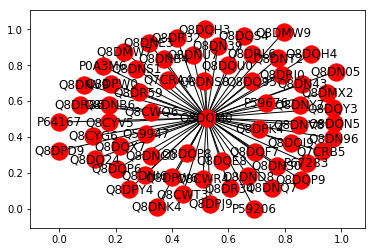

P64073
 ---- 

Liste des 1ers voisine:

Q8DRL6, Q8DQD8, Q8DNJ3, Q8DMY4, Q8DQ73, Q8DNB1, Q8DQ74, Q8DNB3, Q8DQ79, Q8DP78, Q8CY89, Q59947, Q8DNS0, Q8DPH1, P64023, Q8DPH5, Q8DQ41, Q8DN54, Q8DN51, Q8DQT0, Q8DPZ0, Q7CRA7, Q8DQE3, Q8DPZ8, Q8DQE5, Q8DR60, Q8DQM3, Q8DQM1, Q8DPK2, Q8DQ96, Q8DNZ7, Q8DQ40, P0A4D8, Q8DNZ2, Q8DNR6, Q8DPJ9, Q8CM37, P0A4T2, Q8DR65, Q8DR66, Q8DPS9, Q8CZ52, P67685, Q8DQS9, Q8DPU8, Q8DRQ3, Q8DPU4, Q8DP13, Q8DRP0, Q8DPJ7, Q8DNY2, Q8DNY4, Q8DNY5, Q8CYG6, Q8DQ81, Q8DQJ5, Q8DQJ3, Q8DMW2, Q8DQJ8, Q8DPR9, Q8DPR8, Q8DPR2, Q8DPR0, Q8DPR6, Q8DPR4, P0A3C4, Q8DRP7, Q8DRI7, Q8DRI0, Q8DRI1, Q8DRI2, Q8DPT2, Q8DP00, Q8DNG8, P66051, Q8DP04, Q8DP18, Q8DNX8, Q8DQC1, Q8DPE3, Q8DPM6, Q8DPM7, Q8DQK7, Q8CWT4, Q8CWT9, Q8DP70, Q8CWR2, Q8DPW9, Q8DRH2, Q8DN05, Q7CRB5, Q8CYN8, Q8DPA3, Q8CZC0, Q8DP38, Q8CY62, Q8DP37, Q8DPP1, Q8CYI8, P64063, Q8DQH6, Q8DQ30, Q8CWS6, Q8CZ08, Q8DMZ2, Q8CWT3, Q8DQA2, Q8CWT2, Q8DN70, Q8DP29, Q8DP20, Q8DP26, Q8DQ08, Q8DNV8, Q8DN84, P64073, P62576, Q8DPM1, Q8DQI3, Q8CWR4, 

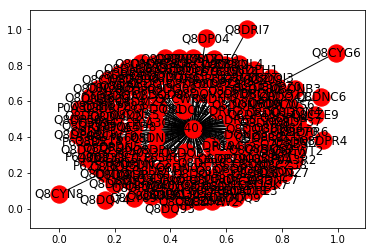

Q8DQE5
 ---- 

Liste des 1ers voisine:

Q8DRL6, Q8DQD4, Q8DMY0, P0A4M0, Q8DMY4, P67414, Q8DNB3, P66709, Q8DP78, Q8DPH8, Q59947, Q8DNS0, Q8DP70, P0A3R2, Q8DRD1, Q8DQT8, Q8DQT9, Q8DPP6, Q8DQT6, P63792, Q8DQT0, Q7CRB1, Q8DQE9, Q8DQR6, Q8DQR4, Q8DPC7, Q8DQE5, Q8DQR1, Q8DPK4, Q8DPK7, Q8DQM7, Q8DPK2, Q8DQZ1, Q8DNA9, P0A4D8, P64073, Q8DPS9, Q8CZ52, Q8DPS6, P66633, Q8DRQ1, Q8DRQ3, Q8DNY9, Q8DPJ9, Q8DQB5, Q8CYG6, Q8DQJ5, Q8DQJ2, P0A484, Q8DMW2, Q8DNQ8, P0A2V9, Q8DPR9, Q8DPR0, Q8DPR4, Q8DRP1, Q8DRP0, Q8DRP7, Q8DRI7, Q8DRI0, Q8DRI1, Q8DPT2, Q8DQX0, Q8DRA5, Q8DP02, Q8DP18, Q8DP09, P0A336, Q8DQC7, Q8DRA9, Q8CWT3, Q8DPM7, Q8DNP9, Q8DPM1, Q8CWT8, P63743, Q8DQ21, Q8CYV1, Q8DR41, Q7CRB8, P0A452, Q8DN05, P67331, Q8CZC0, Q8DP39, Q8CZ85, Q8CYI8, Q8DPL6, P64063, Q8CWS5, Q8CZ03, P65537, Q8DMZ2, Q8DN78, Q8CWT2, Q8DNE9, Q8DP21, Q8DP20, Q8DNV9, Q8DNV8, Q8DQI9, Q8DP13, P62576, P0A3Y4, Q8DR29, Q8DQQ4, Q8DR26, Q8DN69, Q8DPF5, P0A3B8, Q8DQF8, Q8DRK0, P0A2U9, Q8DQ14, Q8CYK3, Q8DPM9, Q8DNY2, Q8DQW8, Q8CZ26, Q8DQN9, 

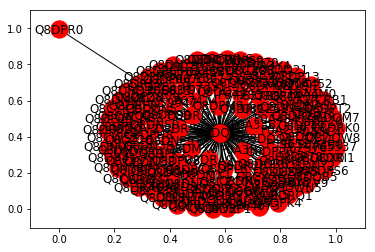

P64167
 ---- 

Liste des 1ers voisine:

Q8DRL6, Q8DPZ8, Q8DQN1, Q8DQD4, Q8DMW9, Q8DMY4, Q8DQL5, Q8DQ73, Q8DQL1, Q8DQ79, Q8DNS6, Q59947, Q8DNS0, Q8DPK8, Q8DPH2, Q8DRD1, Q8DN54, P0A4M6, Q8DR72, Q8DN51, Q8CWW0, Q8DQT7, Q8DQT0, Q8DR79, Q8DPZ1, Q8DPZ0, Q8DPW4, Q8DQE1, Q8DPC7, Q8DQR3, Q8DN38, Q8DNM4, Q8DNA2, Q8DQM0, Q8DQM7, Q8DQ40, Q8DPK9, Q8DQ42, Q8DNR5, P64063, Q8DN42, Q8DN41, Q8DQU8, Q8DR60, Q8CZ53, Q8CZ52, Q8DP39, P67331, Q8DQS9, Q8DPU4, Q8DP55, Q8CYE6, P0A4G3, Q8DPJ9, Q8DPJ8, Q8DNF3, Q8CYG6, Q8DMW7, Q8CWN2, P0A4T2, Q8DRB5, P66603, Q8DP98, Q8DQQ4, Q8DRP1, Q8DNX4, Q8DNX0, Q8DQP4, Q8DRI0, Q8DRI2, Q8DPT2, Q8DRA5, Q8DP04, P0A336, Q8DQP7, Q8DQC1, Q8DPE3, Q8DPL0, Q8DPM6, Q8DPM7, Q8DNP9, Q8DPM1, Q8DNP7, Q8DNP4, Q8DNP3, Q8DQ21, Q8CYV5, Q8DNH3, Q8DNH1, Q8DP87, P64298, Q8DPW9, Q8DRH9, Q8DN05, Q8DRH7, Q7CRB5, Q8DNF9, Q8CZC0, Q8DP38, P65240, P65242, Q8DQY5, Q8DP37, Q8CYI8, Q8DQC6, Q8DQ38, Q8DQ36, Q8DPL9, Q8DQ30, Q8CWS6, Q8CYV9, Q8CZ08, Q8CWS2, Q8CWS3, Q8CWS1, Q8DN78, Q8DQA2, Q8DP21, Q8DP20, Q8DPG4, 

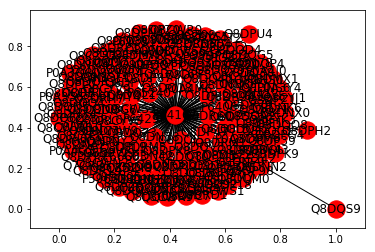

Q8DR70
 ---- 

Liste des 1ers voisine:

Q8DMW9, Q8DN05, Q8DND8, Q7CRB5, Q8DNU7, Q8DPD9, Q8DPJ9, Q8DPY4, Q8DNY7, Q8DMW7, Q8DQH4, Q8DNQ7, Q8DPN3, Q8DNS8, Q8DQN5, P59206, P67283, Q8DQ95, Q8DR34, Q8DQP8, Q8DQP9, Q8DNK4, Q8DNI6, Q8DN39, Q8DPK4, Q8DNT2, Q8DQP6, Q8DNC0, Q8DQX7, Q8DR86, Q8DR32, Q8CWT3, Q8DQI9, Q8DNS1, P59652, Q8CYV5, Q8DN96, Q8DQU0


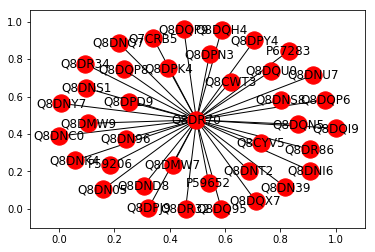

Q8DR57
 ---- 

Liste des 1ers voisine:

Q8DRQ1, Q8DPW1, Q8DN05, Q8DMY4, Q8CYG6, Q8DPL5, Q8CYI8, Q8DPH1, Q8CZ65, Q8DR57, P67283, Q8CYV1, Q8DRI0, Q8DPK7, Q8DPK2, Q8CYY7, Q8DNR6, Q9EUQ7, Q8DPM9, Q8DPQ1, Q7ZAK6, Q8CWP9


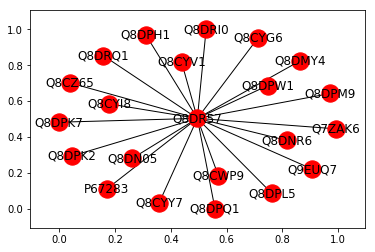

Q8DNE8
 ---- 

Liste des 1ers voisine:

Q8DRL6, Q8DMY8, Q8DQD4, Q8CZE9, P0A4M0, Q8DQL1, Q8DQV2, Q8CYM5, Q59947, Q8DPH1, P59661, Q8DP77, Q8DN54, P0A4M6, Q8DPP8, P63792, Q8DN58, Q8DRK9, Q8DPC2, Q8DPK4, Q8DPK2, P65444, Q8DNZ7, Q8DRC8, Q8CWV8, Q8DPS5, Q8DPS0, P66633, Q8DQS9, Q8DP47, Q8DPU6, Q8DN28, Q8DNY9, Q8DPJ6, Q8DPD4, Q8DPJ9, Q8DQ50, Q8DNY7, Q8CWN5, Q8CWN9, Q8DRB6, P59200, Q8DQ85, Q8DRP0, Q8DRI0, Q8DNX8, Q8DP00, Q8DP03, P0A336, Q8DRA8, Q8CWT3, Q8DPM2, Q8CWT6, Q8DQU7, Q8DQ24, P64023, Q8DPW9, P0A452, Q8DN05, Q8CZC0, Q8DPD9, P67581, Q8DNF0, Q8DQH0, Q8DPL4, Q8DQ38, Q8DPL3, Q8DNW4, Q8DN73, Q8DN74, Q8DPG8, Q8DPG0, Q8CWM8, Q8DP21, Q8DPG4, Q8DNV4, Q8DQ84, Q8CWR0, Q8DR20, Q8DQN9, Q8DQQ8, P0A472, Q8DQF1, Q8DQ10, Q8DQB4, Q8DQ18, Q8CZ25, Q8DQB5, Q8DPN4, Q8CZ28, Q8DQN5, P0A3R0, P0A3R2, Q8DNM8, Q8DPV1, P67283, P63734, Q8DNM1, Q8DNK9, Q8DMX5, Q8DMX6, Q8DQ61, P64298, Q8DRM5, Q8DR02, Q8DRE4, Q8DR09, Q8DPI6, P59652, P66360, Q8DQM3, Q8DQW8, Q8CWP5


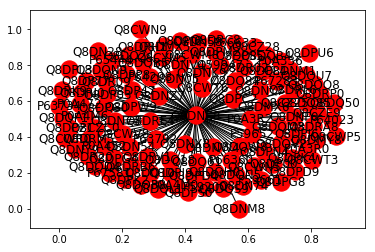

Q8DNI9
 ---- 

Liste des 1ers voisine:

Q8DRL5, Q8DPB8, Q8DNE5, P63589, Q8DQ13, Q8DNB0, Q8DP30, P64063, Q8CWN9, P59661, Q8DRB3, Q8DRD4, Q8CWS5, Q8CWQ4, Q8DPV2, Q8DP91, P0A4J7, Q8DNM1, Q8DNI9, Q8DPR8, Q8DQE0, Q8DNI5, Q8DQX1, Q8DQC8, Q8DNT4, P0A336, Q8CWN4, Q8CWT3, Q9EUQ7, Q8DNY9, Q8CM37, Q8DRC4, Q8DR65, Q8DP83


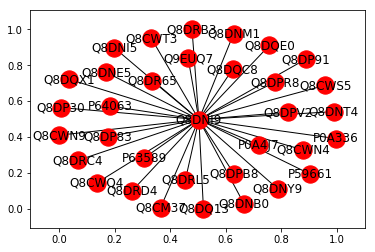

Q9EUQ7
 ---- 

Liste des 1ers voisine:

Q8DRL5, Q8DPB8, Q8DQS8, Q8DPU8, Q8CYC4, Q8DNJ4, Q8DQX7, P67050, Q8DQN7, Q8DNK4, Q8DQL6, Q8DP38, P67581, Q8DRN5, Q8DNX3, Q8DPJ9, Q8DPY4, Q8DPY5, Q8DNQ0, Q8DQJ7, Q8DR10, P0A484, Q8DRD9, P0A4T2, Q8CWN9, Q8DR18, Q8DNW7, Q8DNW4, Q8DRB6, Q8DNJ5, Q8DR57, Q8DQT6, Q8CWN1, Q8DPR7, Q8DPR6, Q8DN97, Q8DNI9, Q8DN79, Q8DN14, Q8DMX5, Q8DMX6, Q8DRI0, Q8DNI5, Q8DNC7, Q8DQZ4, Q8DNT4, P0A336, Q8DND5, Q8DP26, Q8DNG5, Q8DNR6, Q8DQI9, Q9EUQ7, Q8DRC3, Q8DP47, Q8CZ38, Q8DRC4, P59652, Q8CWP9, Q8DP83, Q8DQU7


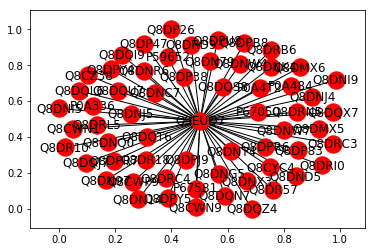

Q8DNS0
 ---- 

Liste des 1ers voisine:

Q8DMY9, Q8DMY8, Q8DMY2, Q8CYT6, Q8DMY6, Q8CYT3, Q8DMY4, Q8DQL5, Q8DQL6, Q8DQL1, Q8DQL2, Q8DQL3, P0A2V9, Q8CYM2, Q8CYM3, P59662, Q8DR77, Q8DR72, Q8CZ40, Q8DR71, Q8DR79, Q8DRK2, Q8DRG6, Q8DRK0, Q8DRK1, Q8DRK6, Q8DRK4, Q8DQR9, Q8DNI1, Q8DRK8, Q8DQR5, Q8DQR2, Q8DQR3, Q8DNI6, Q8DQR1, Q8DPK4, Q8DPK5, Q8DPK7, Q8DPK0, Q8DPK1, Q8DPK2, P65444, Q8DQH3, Q8DPK8, Q8DPK9, Q8DNR5, Q8DNR7, Q8DP91, Q8DNR0, Q8DNR9, Q8DNR8, Q8CWV8, Q8DNB6, Q8DQI6, Q8CWV0, Q8CWV3, Q8DQU0, Q8DQU7, Q8CWV4, Q8CWV7, Q8CWV6, Q8DN25, Q8DN26, Q8DPU8, Q8DPU6, Q8DPU7, Q8DPU4, Q8DPU0, Q8DP13, Q8DQ59, P0A4G3, Q8DP16, Q8DNV7, Q8DP14, Q8DQ51, Q8DQ50, Q8DRB8, Q8DMW7, Q8DMW2, P65537, Q8DRB0, P66445, Q8DMW9, Q8DRB4, Q8CZA7, Q8DRB6, Q8DPR9, Q8DPR8, Q8DQB4, Q8DPR2, Q8DPR0, Q8DPR6, Q8DPR4, Q8DRP3, Q8DRP1, Q8DRP0, Q8DRP7, Q8DRP9, Q8DRP8, Q8DRM3, Q8CYF8, P66051, P64311, Q8CWM8, Q8DRA5, Q8DQ26, Q8DQ24, Q8DQ25, Q8DNG8, Q8DQ21, P59214, Q8DQB2, Q7ZAK6, Q8DP71, Q8DP80, Q8DP83, Q8DP87, Q8DN69, Q7CRB8, Q8DPH0, 

Q8DR29
 ---- 

Liste des 1ers voisine:

P61361, Q8DRL6, Q8DP55, Q8DQD4, P65833, Q8DMY1, Q8DNJ0, Q8DMY4, Q8DQL5, Q8DQL1, Q8DQM9, Q8DNS6, Q8DP04, Q59947, Q8DNS0, Q8DP70, P59661, Q8DPK9, Q8DN55, Q8DR72, Q8DQT7, Q8DN59, Q8CWQ5, Q8DRK0, Q7CRA7, Q8DRK4, Q8DQR9, Q8DPW4, Q8DQE1, Q8DQE5, Q8DQR3, Q8DN38, Q8DNI7, Q8DPK4, Q8DQM2, Q8DNR6, Q8DNA4, Q8DNA5, Q8DPK2, P66420, Q8DNZ7, Q8DQ40, P0A4D8, Q8DNR5, Q8DNM4, Q8DP78, Q8DNR9, Q8DRC5, Q8DR67, Q8DPS8, Q8CZ53, Q8DPS6, Q8DPS7, Q8DPS0, P0A2W7, Q8DNZ0, Q8DPU8, P66201, Q8DPB0, Q8DP13, Q8DQ59, Q8DRG8, Q8DMX8, Q8DPJ9, Q8DQ50, Q8DNY5, Q8CYG6, Q8CWN0, Q8CWU6, Q8DNQ3, Q8CWU0, P0A4T0, Q8CWN7, Q8DNQ7, Q8CWN9, Q8DRB3, P66566, Q8DR54, Q8DPR0, Q8DPR6, P67531, Q8DQH0, Q8DRP0, Q8DQ62, Q8DNX0, Q8DRP8, Q8DRI0, Q8DNX9, Q8DPT2, P66279, Q8DP00, Q8DRA6, Q8DQX3, Q8DRE0, P0A336, P65145, Q8DQC1, Q8CWT3, Q8DPM7, Q8DQK1, Q8DPL3, Q8DNP9, Q8CWT4, Q8DNP7, Q8DNP5, Q8CWT8, Q8DNP3, Q8DR68, Q8DPH1, Q8DNH3, Q8DNH1, Q7ZAK7, Q8DRA1, Q7CRB8, Q8DN05, Q8DRH7, Q8DNF9, P63545, P65242, Q8DQY4, 

Q7ZAK7
 ---- 

Liste des 1ers voisine:

Q8DRL5, P65833, Q8DNJ7, Q8DMY4, Q8DQL5, Q8DNB0, Q8DNS6, Q8DP70, P59661, Q8DN55, Q8DR72, Q8CWW0, Q8DQT7, Q8DN58, Q8DPZ1, Q8DQR4, Q8DNI5, Q8DN38, Q8DNI7, Q8DNA1, Q8DPK9, Q8DRC4, Q8DRC5, Q8DR67, Q8DPS8, Q8DPS4, Q8DPS5, Q8DPS6, Q8DPS0, Q8DN27, Q8DPB8, Q8DPU5, Q8DPU0, Q8DP13, Q8DPJ9, Q8DPJ8, Q8DQ57, Q8CWN0, Q8CWU7, P0A4T0, Q8DMW2, Q8CWN9, Q8DRB4, Q8DQG9, Q8DRI5, Q8DPR0, Q8DP78, Q8DQ62, Q8DNX0, Q8DQP4, Q8DRP9, Q8DRP8, Q8DRI0, Q8DPT2, Q8DP00, Q8DRA6, Q8DQX3, Q8DQX8, Q8DPL0, Q8DPM6, Q8DQQ7, Q8CWT6, Q8CWT4, Q8CWV5, Q8DNP3, Q8DNP2, Q8DNP1, Q8DPM9, Q7ZAK3, Q8CYV1, Q7ZAK7, Q8DP83, Q8CYV9, Q8DNC3, Q7CRB8, Q8DN06, Q8DRH7, P67050, Q8DNF9, P63545, Q8DRJ2, P65242, Q8DP37, P64063, Q8DQ37, Q8DPL9, Q8DR34, Q8DQA5, Q8DNE7, Q8DNE0, Q8DN74, Q8DRG0, Q8DQI8, Q8DQI3, Q8DQ05, Q8DNV7, Q8DR29, Q8DQQ6, Q8DNN2, Q8DQ84, Q8DQQ2, Q8DQ86, Q8DNN6, Q8DRD6, Q8DPF1, Q8DPI6, Q8DQ17, Q8DQ18, Q8DRF5, Q8DQN1, Q8DQV2, Q8DQV1, Q8DPV2, Q8DNM4, Q8DQE1, Q8DQG0, Q8DNK6, Q8DMX0, Q8DQR3, Q8DPX9, 

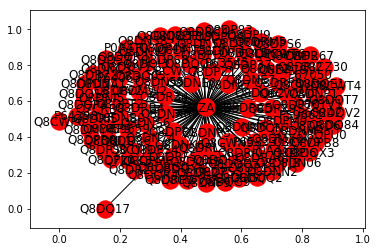

Q8DR55
 ---- 

Liste des 1ers voisine:

Q8CYI8, Q8DQJ0, Q8DN05, Q8CZE9, Q8CWR7, P66943, Q8CZ41, Q8CWV0, Q8DR25


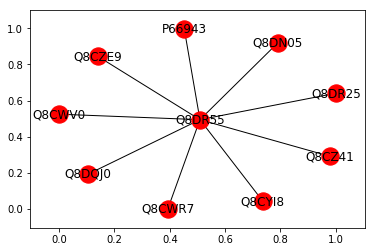

Q8DPV4
 ---- 

Liste des 1ers voisine:

Q8DRL6, Q8DMY8, Q8DQD4, Q8CZE9, P0A4M0, Q8DQL1, Q8DQV2, Q8CYM5, Q59947, Q8DPH1, P59661, Q8DP77, Q8DN54, P0A4M6, Q8DPP8, P63792, Q8DN58, Q8DRK9, Q8DPC2, Q8DPK4, Q8DPK2, P65444, Q8DNZ7, Q8DRC8, Q8CWV8, Q8DPS5, Q8DPS0, Q8DQS9, Q8DP47, Q8DPU6, Q8DN28, Q8DNY9, Q8DPJ6, Q8DPD4, Q8DPJ9, Q8DQ50, Q8DNY7, Q8CWN5, Q8CWN9, Q8DRB6, P59200, Q8DQ85, Q8DRP0, Q8DRI0, Q8DNX8, Q8DP00, Q8DP03, P0A336, Q8DRA8, Q8CWT3, Q8DPM2, Q8CWT6, Q8DQU7, Q8DQ24, P64023, Q8DPW9, P0A452, Q8DN05, Q8CZC0, Q8DPD9, P67581, Q8DNF0, Q8DQH0, Q8DPL4, Q8DQ38, Q8DPL3, Q8DNW4, Q8DN73, Q8DN74, Q8DPG8, Q8DPG0, Q8CWM8, Q8DP21, Q8DPG4, Q8DNV4, Q8DQ84, Q8CWR0, Q8DR20, Q8DQN9, Q8DQQ8, P0A472, Q8DQF1, Q8DQ10, Q8DQB4, Q8DQ18, Q8CZ25, Q8DQB5, Q8DPN4, Q8CZ28, Q8DQN5, P0A3R0, P0A3R2, Q8DNM8, Q8DPV1, P67283, P63734, Q8DNM1, Q8DNK9, Q8DMX5, Q8DMX6, Q8DQ61, P64298, Q8DRM5, Q8DR02, Q8DRE4, Q8DR09, Q8DPI6, P59652, P66360, Q8DQM3, Q8DQW8, Q8CWP5


Q8DP40
 ---- 

Liste des 1ers voisine:

Q8DRL6, Q8DRL5, Q8DQD4, P65833, Q8DNJ7, Q8DNJ6, Q8DNJ1, Q8DN88, Q8DQ70, Q8DNB6, Q8DNB0, Q8DQ79, Q8DQG4, Q8CYE2, Q8DP78, P0A3R0, Q8CYM5, Q59947, Q8DNS0, Q8DP70, Q8DPH0, Q8CWN9, Q8DPH5, Q8DP77, Q8DN55, Q8DNM1, Q8DR73, Q8CWQ4, Q8CWW0, P0A4J0, Q8DN58, Q8DPV2, Q8CYW8, Q8DNV9, Q8DRK7, Q8DRK4, Q8DQE0, Q8DQR2, Q8DQE6, Q8DPC2, P65335, Q8DQM2, Q8DP64, Q8DNZ9, Q8DPK1, P65444, Q8DPK8, Q8DPK9, Q8DQ42, Q8DNR5, Q8DRC8, P0A496, Q8DNR0, Q8CM37, Q8DRC3, Q8DRC4, Q8DRC5, Q8DR65, Q8DR64, Q8DQU8, Q8DPS8, Q8DPS9, Q8CZ52, Q8DPS4, Q8DPS5, Q8DPS6, Q8DQL1, Q8DRJ1, Q8DN27, Q8DRJ2, Q8DQL5, Q8DPU6, P65242, Q8DNV4, Q8CYE6, Q8DNL1, P66041, Q8DNY2, Q8DQ50, Q8DQ57, Q8DNY5, Q8DNY6, P63734, Q8CWN0, Q8DQC0, Q8DNQ4, Q8CWN4, P0A3M6, P65537, Q8DNQ9, Q8DRB3, Q8DRB5, Q8DP98, Q8DPR8, Q8DR59, Q8DPR0, Q8DRI5, Q8DRP9, Q8DRP8, Q8DRI0, Q8DPT3, Q8DPT2, Q8DP00, Q8DNG8, Q8DNX9, Q8DQX7, Q8DQX8, Q8DRA8, Q8DPE3, Q8DPM6, Q8DQK4, P0A2W9, Q8CWT6, Q8DNP9, Q8DQ26, Q8DNP6, P0A2U9, Q8DNP1, Q8DNC5, Q8DNH3, 

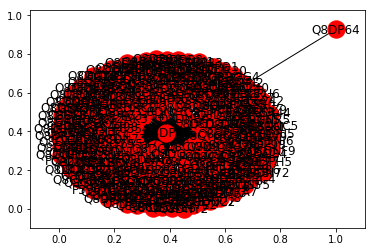

Q8DR69
 ---- 

Liste des 1ers voisine:

Q8DPW8, Q8DQF1, Q8DN05, Q8DPU0, Q8DMY4, Q8DPJ9, Q8DP37, Q8DQ57, Q8CYG6, Q8DQ18, Q8CWU7, Q8DQH6, Q8DQ30, Q8DNW5, P0A3R4, Q8DPV2, Q8DQT0, Q8DQA5, Q7CRA7, Q8DRI0, Q8DNE9, Q8DN74, Q8DPT0, Q8DMX2, Q8DPS5, Q8DQX8, Q8DP21, Q8DPM6, P0A496, Q8CWT6, Q8DPI2, Q8DN58, Q8DPI6, Q8DNP1, Q7ZAK3, Q8DQ84, Q8DPS4, P0A4K5, Q8CWR9


Q8CWQ5
 ---- 

Liste des 1ers voisine:

Q8DRL6, Q8DRL5, Q8DQD4, P65833, Q8DNJ7, Q8DNJ6, Q8DNJ1, Q8DN88, Q8DQ70, Q8DNB6, Q8DNB0, Q8DQ79, Q8DQG4, Q8CYE2, Q8DP78, P0A3R0, Q8CYM5, Q59947, Q8DNS0, Q8DP70, Q8DPH0, Q8CWN9, Q8DPH5, Q8DP77, Q8DN55, Q8DNM1, Q8DR73, Q8CWQ4, Q8CWW0, P0A4J0, Q8DN58, Q8DPV2, Q8CYW8, Q8DNV9, Q8DRK7, Q8DRK4, Q8DQE0, Q8DQR2, Q8DQE6, Q8DPC2, P65335, Q8DQM2, Q8DP64, Q8DNZ9, Q8DPK1, P65444, Q8DPK8, Q8DPK9, Q8DQ42, Q8DNR5, Q8DRC8, P0A496, Q8DNR0, Q8CM37, Q8DRC3, Q8DRC4, Q8DRC5, Q8DR65, Q8DR64, Q8DQU8, Q8DPS8, Q8DPS9, Q8CZ52, Q8DPS4, Q8DPS5, Q8DPS6, Q8DQU7, Q8DQL1, Q8DRJ1, Q8DN27, Q8DRJ2, Q8DQL5, Q8DQS8, Q8DPU6, P65242, Q8DNV4, Q8CYE6, Q8DN69, Q8DNL1, P66041, Q8DNY2, Q8DQ50, Q8DQ57, Q8DNY5, Q8DNY6, P63734, Q8CWN0, Q8DQC0, Q8DNQ4, Q8CWN4, P0A3M6, P65537, Q8DNQ9, Q8DRB3, Q8DRB5, Q8DRB6, Q8DP98, Q8DPR8, Q8DR59, Q8DPR0, Q8DRI5, Q8DRP9, Q8DRP8, Q8DRI0, Q8DPT3, Q8DPT2, Q8DP00, Q8DNG8, Q8DNX9, Q8DQX7, Q8DQX8, Q8DRA8, Q8DPE3, Q8DPM6, Q8DQK4, P0A2W9, Q8CWT6, Q8DNP9, Q8DQ26, Q8DNP6, 

Q8DQM2
 ---- 

Liste des 1ers voisine:

Q8DRL6, Q8DRL5, Q8DQD4, P65833, Q8DNJ7, Q8DNJ6, Q8DNJ1, Q8DN88, Q8DQ70, Q8DNB6, Q8DNB0, Q8DQ79, Q8DQG4, Q8CYE2, Q8DP78, P0A3R0, Q8CYM5, Q59947, Q8DNS0, Q8DP70, Q8DPH0, Q8CWN9, Q8DPH5, Q8DP77, Q8DN55, Q8DNM1, Q8DR73, Q8CWQ4, Q8CWW0, P0A4J0, Q8DN58, Q8DPV2, Q8CYW8, Q8DNV9, Q8DRK7, Q8DRK4, Q8DQE0, Q8DQR2, Q8DQE6, Q8DPC2, P65335, Q8DQM2, Q8DP64, Q8DNZ9, Q8DPK1, P65444, Q8DPK8, Q8DPK9, Q8DQ42, Q8DNR5, Q8DRC8, P0A496, Q8DNR0, Q8CM37, Q8DRC3, Q8DRC4, Q8DRC5, Q8DR65, Q8DR64, Q8DQU8, Q8DPS8, Q8DPS9, Q8CZ52, Q8DPS4, Q8DPS5, Q8DPS6, Q8DQU7, Q8DQL1, Q8DRJ1, Q8DN27, Q8DRJ2, Q8DQL5, Q8DQS8, Q8DPU6, P65242, Q8DNV4, Q8CYE6, Q8DN69, Q8DNL1, P66041, Q8DNY2, Q8DQ50, Q8DQ57, Q8DNY5, Q8DNY6, P63734, Q8CWN0, Q8DQC0, Q8DNQ4, Q8CWN4, P0A3M6, P65537, Q8DNQ9, Q8DRB3, Q8DRB5, Q8DRB6, Q8DP98, Q8DPR8, Q8DR59, Q8DPR0, Q8DRI5, Q8DRP9, Q8DRP8, Q8DRI0, Q8DPT3, Q8DPT2, Q8DP00, Q8DNG8, Q8DNX9, Q8DQX7, Q8DQX8, Q8DRA8, Q8DPE3, Q8DPM6, Q8DQK4, P0A2W9, Q8CWT6, Q8DNP9, Q8DQ26, Q8DNP6, 

Q8DQM1
 ---- 

Liste des 1ers voisine:

Q8DRL6, Q8DQD4, Q8CYT3, Q8DMY4, Q8DQL1, Q8DP78, Q8CY89, Q59947, Q8DNS0, Q8DPH1, Q8DN54, Q8DR71, Q8DN05, Q8DNV9, Q8DPC2, Q8DPK4, Q8DQM1, Q8DPK2, Q8DNR5, P64031, Q8DPS8, Q8CWV4, Q8DQS9, Q8DP13, Q8DQ59, Q8DPJ4, Q8DPJ9, Q8DNY5, Q8DRB8, Q8CWU0, Q8DMW2, Q8DQ56, Q8DR54, Q8DN47, Q8DPR0, Q8DP96, Q8DRI7, Q8DRI0, Q8DP00, Q8DP04, Q8DQX6, Q8DPE3, Q8DPM7, Q8CYM0, Q8DNP9, Q8DPM1, Q8CWT8, Q8DP70, Q8DNH1, Q8DPW9, Q7CRB1, Q8DPW7, Q8DPD8, Q8DQY8, Q8DP35, Q8DQY3, Q8CYI8, P64063, Q8CWS6, Q8DNE4, Q8DN78, Q8DNE3, Q8DN70, Q8DQ25, Q8DP21, P66836, Q8DQ08, Q8DRG5, P64073, P62576, Q8DRG8, Q8DN59, Q8CWR6, Q8DND2, P0A472, Q8DQF1, Q8DQF8, Q8DQ18, Q8DRF5, Q8CZ25, Q8CZE9, Q8DQN5, Q8DQV2, Q8CWQ6, P67283, Q8CYS5, Q8DPV9, Q8DQG0, P0A3C4, Q8DNT3, Q8CYJ8, Q8DRM4, Q8DPX4, Q8DRM6, Q8DR03, Q8DQM3, Q8DP45, Q8DP44, P59652, Q8DQW8, Q8CWP2, Q8DNL4


P65467
 ---- 

Liste des 1ers voisine:

Q8DRL7, Q8DRL6, Q8DQD4, Q8DNJ7, Q8DQD7, Q8DQL1, Q8DNB3, Q8DQN5, Q8DP78, Q59947, Q8DRD9, Q8DP70, Q8DP77, Q8DN54, Q8DN55, Q8DR73, P59202, Q8CWW0, Q8DN59, Q8CWQ5, Q7CRA7, Q8DRK4, Q8DPZ8, Q8DPC2, Q8DPK4, Q8DQM2, Q8DNA3, Q8DNZ9, Q8DPK2, Q8DNR0, Q8DRC8, Q8DRG0, Q8DQ00, Q8DN41, Q8CWV3, Q8DN27, Q8DRJ2, Q8DQS9, Q8DQ05, Q8DP13, Q8DQ59, Q8DPJ9, Q8DQB3, Q8DMW1, Q8DNQ5, Q8DNK9, Q8DPR9, Q8DR54, Q8DPR0, P67531, Q8DRP7, Q8DRI4, Q8DRI0, Q8DRI1, Q8DNX9, Q8DQX1, Q8DP03, Q8DP04, Q8DQX8, Q8DRA8, Q8DPM7, Q8DNS0, Q8DQ28, Q8DP00, Q8DRA6, Q8DPH1, Q8DNH3, Q8DPW9, Q8DRH8, P63896, Q8DN05, P65240, P65242, Q8DPD2, P64063, Q8DQH6, Q8CWS5, Q8CWS3, Q8DN91, Q8DRE0, Q8DN76, Q8DN74, Q8DPG8, Q8DN66, P64073, Q8DQI7, Q8DNV4, Q8DNV6, Q8DQQ6, Q8DQQ2, Q8DR79, P0A472, P0A474, Q8CYC9, Q8DQA6, Q8DP40, Q8DR92, Q8DQ18, Q8CZ25, Q8CZ23, Q8DPN3, Q8DQN4, Q8DNY5, Q8DQV2, Q8CWQ4, Q8DPV2, P67283, Q8CYS5, Q8DNM1, Q8DQ91, Q8DRK9, Q8DR15, P0A3C4, Q8DMX2, P64298, Q8DRM4, Q8DRM5, Q8DRM6, Q8CWN4, Q8DR03, 

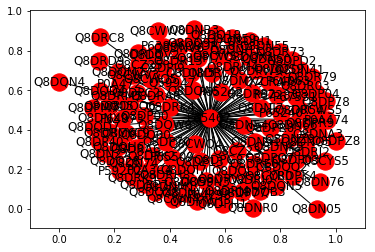

P59676
 ---- 

Liste des 1ers voisine:

Q8DRL6, Q8DQD7, Q8DNB6, Q8DQL2, Q8DQL3, Q59947, Q8DNS0, Q8DNS1, Q8DPH3, Q8DNS8, Q8DN54, Q8DPZ3, Q8DQE8, Q7CRA4, Q8DQE6, Q8DNI6, Q8DN39, Q8DPK5, Q8DQM0, Q8DNZ9, Q8DPW6, Q8DN83, P0A496, Q8DPS8, Q8DPS6, Q8DQU0, Q8DRJ1, Q8DQM2, Q8DQS9, Q8DRQ1, Q8DPB7, Q8DNY2, Q8DNY7, Q8CWN0, Q8DMW7, Q8DQJ5, Q8DNQ4, Q8DNQ7, Q8CWN9, Q8DMW9, P59206, Q8DR59, Q8DQP8, Q8DQP9, Q8DRI6, Q8DPT6, Q8DRI0, Q8DPL7, Q8DQP6, Q8DPT2, Q8CY81, Q8DP04, Q8DQX7, Q8DPE4, Q8DQC6, Q8CWT3, Q8CWT1, Q8CWT0, Q8DPM2, Q8DNP9, Q8DPM1, Q8DQ25, Q8DNP1, Q8CYV5, Q8DNH1, Q8DP80, P66321, P0A3M6, Q8DPW9, Q8DN05, Q7CRB5, Q8DN00, Q8DPD9, Q8CYI8, Q8CWS3, Q8DR32, Q8DR34, Q8DQA5, Q8DNV8, Q8DRG2, Q8DQK3, Q8DQI9, Q8CWT4, Q8DNV6, Q8CWR4, Q8DN96, Q8DNP4, Q8DND8, Q8DNE6, Q8DN66, Q8DNU7, Q8DQ10, Q8DPY2, Q8DR95, Q8DPJ9, Q8DPY4, Q8DQ18, Q8DQN9, Q8DP50, Q8DQN5, Q8CWQ5, P67283, Q8CYS5, Q8DQ95, Q8DQG3, Q8DPA7, Q8DNK4, Q8DNT2, Q8CYJ1, Q8DNC5, Q8DQ66, Q8DQ67, Q8DNC0, Q8DR82, Q8CYJ8, Q8DR86, Q8DRE0, P65505, P59676, Q8DP47, 

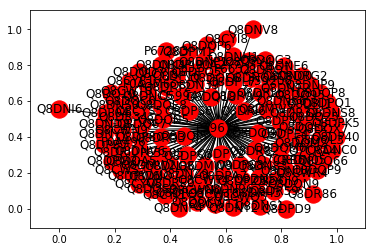

Q8DPW6
 ---- 

Liste des 1ers voisine:

Q8DRL6, Q8DQF0, Q8DN26, Q8DRQ1, Q8DQF7, Q8DR34, Q8DN05, Q8DND8, Q8DQS2, Q8DNB4, Q8DNB6, Q8DPD9, Q8DPA6, P59652, Q8DNB8, Q8DPY4, Q8DNY7, Q8DRB8, Q8DMW7, Q8DQH3, Q7CRA4, Q8DQH6, Q8DNQ7, Q8CWN9, Q8DRD6, Q8DNS8, Q8DQN5, Q8DN96, Q8DPV2, Q8DQS4, P67283, Q8DR59, Q8DQ95, Q8CY68, Q8DP94, Q8DNE6, Q8DNE0, Q7CRA7, Q8DQG7, Q8DPT6, Q8DRI0, Q8DNE9, Q8DMX2, Q8DN39, Q8DQP6, P59676, Q8DQM0, Q8DNI6, Q8DR86, Q59947, Q8CWT3, P65505, Q8DNR1, Q8DNS0, P0A3M6, Q8DRC5, Q8CWR4, Q8DNU7, Q8DPS8, Q8DR32, Q8DPS6, Q8DQU0, Q8DR25, Q8CYG6


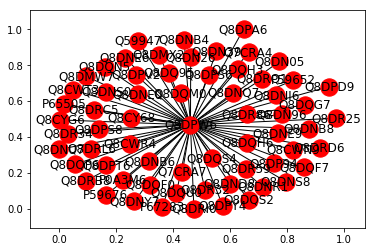

Q8DQH3
 ---- 

Liste des 1ers voisine:

Q8DRL6, Q8DRL5, Q8DNJ9, Q8DQD4, Q8DQD7, Q8DNB4, Q8DNE7, Q8DP78, Q59947, Q8CYM0, Q8DNS1, Q8DP70, Q8DNS8, Q8DMY3, Q8CWW0, Q8DN58, Q8DRK0, Q8DQE8, Q8DNV8, Q8DQE6, Q8DNI6, Q8DN39, Q8DPK4, P67283, Q8DQM0, Q8DP63, Q8DPK1, Q8DQ95, Q8DPL3, P0A496, Q8DRG0, Q8DPS8, Q8DN46, Q8DPD9, Q8DPS6, Q8DQU0, P0A2W7, Q8DRJ1, Q8DN27, Q8DPB8, Q8DQS4, Q8DQS2, Q8DP13, Q8DP10, Q8DPJ9, Q8DQ50, Q8DQ57, Q8DNY5, Q8CYG6, Q8DNY7, Q8DMW7, Q8DNR6, Q8DNQ4, Q8CWN4, Q8DQQ6, Q8DRB0, Q8DMW9, Q8DNQ7, Q8DPR2, Q8DPR0, Q8DNK4, Q8DQQ2, Q8DQP8, Q8DQP9, Q8DRI5, Q8DRP9, Q8DRI0, Q8DQH2, Q8DQP6, Q8DNX8, Q8DP00, Q8DNG8, Q8DQX7, Q8DQC1, Q8CWT3, Q8CWT6, Q8DNC7, Q8DQ26, Q8DNP6, Q8DNP1, Q8CYV5, Q7ZAK3, Q8DR46, Q8DP83, Q8DRH8, Q8DN05, Q8DMW2, Q8DPW6, Q8DN00, Q8DNF8, Q8DP38, Q8DPD4, Q8DPL4, Q8CYI8, Q8DQH3, Q8DQH6, Q8DN55, Q8DQ36, Q7CRB5, Q8DR32, Q8DR34, Q8DQA5, Q8DND8, Q8DNE9, Q8DQP2, Q8DP26, Q8DN86, Q8DQI9, Q8DNY9, Q8DQI7, Q8DNS0, Q8DQ05, Q8DNN0, Q8CWR7, Q8DN96, Q8DR20, Q8DR22, Q8DPF5, Q8DQF7, Q8DQF9, 

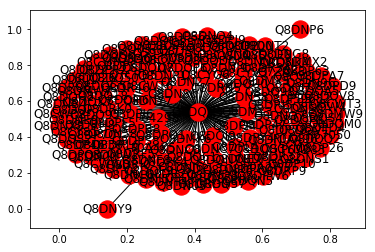

Q8DNV6
 ---- 

Liste des 1ers voisine:

Q8DRL6, Q8DRL5, Q8DQD4, P65833, Q8DNJ7, Q8DNJ6, Q8DNJ1, Q8DN88, Q8DQ70, Q8DNB6, Q8DNB0, Q8DQG4, Q8CYE2, Q8DP78, Q8DQ00, Q8CYM5, Q59947, Q8DNS0, Q8DP70, Q8DPH0, Q8CWN9, Q8DPH5, Q8DP77, Q8DN55, Q8DNM1, Q8DR73, Q8CWQ4, Q8CWW0, P0A4J0, Q8DN58, Q8DPV2, Q8CYW8, Q8DQ08, Q8DRK7, Q7CRA4, Q8DQE0, Q8DQR2, Q8DQE6, Q8DPC2, P65335, Q8DQM2, Q8DP64, Q8DNZ9, Q8DPK1, P65444, Q8DPK8, Q8DPK9, Q8DQ42, Q8DNR5, Q8DRC8, P0A496, Q8DNR0, Q8CM37, Q8DRC3, Q8DRC4, Q8DRC5, Q8DR65, Q8DR64, Q8DQU8, Q8DPS8, Q8DPS9, Q8CZ52, Q8DPS4, Q8DPS5, Q8DPS6, Q8DQU7, Q8DQL1, Q8DRJ1, Q8DN27, Q8DRJ2, Q8DQL5, Q8DQS8, Q8DPU6, Q8DNV4, Q8DP13, Q8DN69, Q8DNL1, P66041, Q8DNY2, Q8DQ50, Q8DQ57, Q8DNY5, Q8DNY6, P63734, Q8CWN0, Q8DQC0, Q8DNQ4, Q8CWN4, P0A3M6, P65537, Q8DNQ9, Q8DRB3, Q8DRB5, Q8DRB6, Q8DP98, Q8DPR8, Q8DR59, Q8DPR0, Q8DRI5, Q8DRP9, Q8DRP8, Q8DRI0, Q8DPT3, Q8DPT2, Q8DP00, Q8DNG8, Q8DNX9, Q8DQX7, Q8DQX8, Q8DRA8, Q8DPE3, Q8DQK4, P0A2W9, Q8CWT6, Q8DNP9, Q8DQ26, Q8DNP6, P0A2U9, Q8DNP1, Q8DNC5, 

Q8DQH4
 ---- 

Liste des 1ers voisine:

Q8DND2, Q8DRL6, Q8DQD4, Q8DPW1, Q8DN05, Q8DMY0, Q8DQS0, Q8DN66, Q8DPD9, Q8DQL1, Q8DQ77, P65242, Q8DPJ9, Q8DNF2, Q8DQY3, Q8DQY5, Q8DNY7, Q8DPL7, Q8DPJ8, Q8DQH4, Q59947, Q8DNS0, Q8DPK4, Q8DP77, Q8DPN4, Q8DNW6, Q8DQN5, Q8DQV2, Q8DMY3, Q8DR53, P65240, Q8DPV1, Q8DMY2, P0A4H8, Q8DQF8, Q8DNX6, Q8DRK1, Q8DR70, Q8DNE3, Q8DQR6, Q8DRI0, P0A336, Q8DRI7, Q8DMX0, Q8CYI8, Q8DPC2, Q8DN02, Q8DQM3, Q8DQM0, Q8DPE7, Q8DNZ7, Q8DMY4, Q8DRM5, Q8CWT3, Q8DNV8, Q8DRE4, Q8CWQ6, Q8CZD2, P0A4Q0, Q8DNR9, P63743, Q8DQ84, Q8DNL3, Q8DR26, Q8DNL4


Q8DNV8
 ---- 

Liste des 1ers voisine:

Q8DRL6, Q8DQD8, Q8CWV8, P0A4M6, Q8CZ28, Q8DQD7, Q8CWN6, P65608, Q8DMY4, P67319, Q8DNB4, Q8DQ96, Q8DNB6, Q8DNB3, P66709, Q8DQ46, Q8DR28, Q8DPH9, Q59947, Q8DNS0, Q8DNS1, Q8DRD7, Q8DPH0, P59662, Q8DRD4, Q8DNS8, Q8DPK9, Q8DN54, Q8DQD4, Q8DN56, Q8DQT8, Q8DR73, Q8DQE3, P66096, Q8DQT6, P0A4J0, Q8DQT0, Q7CRB1, Q8DR79, Q8CYW8, Q8DN35, Q8DRK4, Q8DQR9, Q8DQX2, Q8DRK9, Q8DQR2, Q8DQE5, Q8DN39, Q8DPK4, Q8CWQ8, Q8DNA2, Q8DNA3, Q8DR17, Q8DPK2, Q8DNM5, Q8DNZ7, Q8DN38, P0A4D8, Q8DNZ2, Q8DNR6, P64073, Q8CYL2, Q8DRC3, Q8DRF9, Q8DNR9, Q8DPR6, Q8DN43, Q8DN42, Q8DN41, Q8DPS8, Q8CZ52, P66718, Q8CWV3, Q8DQU0, Q8DPS0, Q8CWV4, Q8DQX5, Q8DN26, Q8DPJ8, Q8DPU8, Q8DPU6, Q8DQS4, Q8DN28, Q8DNY9, Q8DN69, Q8DRP0, Q8DPJ7, Q8DPJ6, P59676, Q8DPJ4, Q8DNY2, Q8DQ50, Q7CRB2, Q8CYG6, Q8DNY7, Q8DMW7, Q8DQJ5, Q8CWN4, Q8DNQ7, P65537, Q8CWN8, P66566, Q8DMW9, Q8DRB4, Q8DQJ8, P59206, Q8DPR9, Q8DRJ2, Q8DR59, Q8DPD2, Q8DP97, Q8CWR0, Q8DQP8, Q8DQP9, Q8DRP1, Q8DNX4, Q8DRP7, Q8DN16, Q8DQP4, Q8DRP9, 

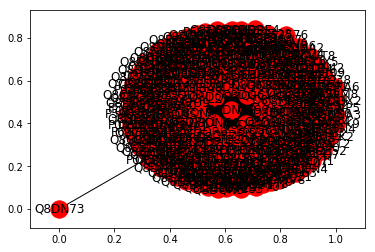

Q8DQE8
 ---- 

Liste des 1ers voisine:

Q8DRL6, Q8DQF0, Q8DN26, Q8DRQ1, Q8DQF7, Q8DQS4, Q8DN05, Q8DND8, Q7CRA4, Q8DNE6, Q8DQS2, Q8DNB4, Q8DNB6, Q8DPD9, Q8DPA6, P59652, Q8DQ57, Q8DNB8, Q8DPY4, Q8DNY7, Q8DRB8, Q8DMW7, Q8CWU7, Q59947, Q8DQH6, Q8DNQ7, Q8CWN9, Q8DRD6, Q8DNI6, Q8DNS8, Q8DQN5, Q8DN96, Q8DPV2, P67283, Q8DR59, Q8DQ95, Q8CY68, Q8DP94, Q8DQA5, Q8DNE0, Q7CRA7, Q8DQG7, Q8DPT6, Q8DRI0, Q8DNE9, Q8DMX2, Q8DN39, P59676, Q8DQM0, Q8DQP6, Q8DQH3, Q8DR86, Q8DR32, Q8CWT3, P65505, Q8DNR1, Q8DNS0, P0A3M6, Q8DNP1, Q8DRC5, Q8CWR4, Q8DNU7, Q8DPS8, Q8DR34, Q8DPS6, Q8DQU0, Q8DR25, Q8CYG6


Q8CZ65
 ---- 

Liste des 1ers voisine:

Q8DNV9, Q8DRL5, Q8DPB8, Q8DP26, Q8DN05, Q8DNT4, Q8DRI0, Q8DNI5, Q8DRN5, Q8DMY4, Q8DNC7, Q8DP38, Q8CZ65, Q8CWP9, Q8DR57, P67283, Q8DPJ9, Q8DP83, Q8CYG6


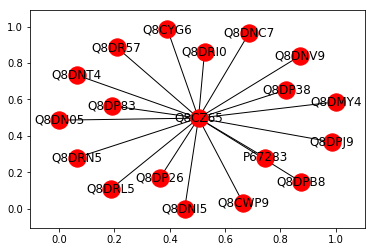

Q8DPK2
 ---- 

Liste des 1ers voisine:

Q8DMY4, Q8DQL5, Q8DQL2, Q8DQL3, Q8DR73, Q8DR79, Q8DRK7, Q8DRK4, Q8DQR4, Q8DRK9, Q8DQR1, Q8DPK5, Q8DPK2, Q8DPK8, Q8DPK9, Q8DNR5, Q8DNR6, Q8DNR9, Q8DNR8, Q8CWV8, Q8DQU8, Q8CWV3, Q8DQU7, Q8DPU8, Q8DPU6, Q8DPU4, Q8DPU5, Q8DQ59, Q8DQ58, Q8DP16, Q8DP18, Q8DQ50, Q8DQ57, Q8DQ55, Q8DMW6, Q8DMW1, Q8DMW2, P65537, Q8DRB0, Q8DRB5, Q8DRB4, Q8DRB6, Q8DPR9, Q8DPR2, Q8DPR0, Q8DPR7, Q8DPR6, Q8DPR4, Q8DRP1, Q8DRP0, Q8DRP7, Q8DRP8, Q8DQ25, P0A2U9, Q8DQ21, Q7ZAK6, Q8DP87, Q7CRB8, Q7CRB1, P67507, Q7CRB7, Q8CYI8, Q8DMZ2, Q8DMZ1, Q8DPG8, Q8DPG9, Q8DNV9, Q8DNV8, Q8DQI5, Q8DQI3, Q8DNV4, Q8DQI1, P0A4C4, Q8DND2, Q8DRN7, P67685, Q8DPN4, Q8DQV2, Q8DQV3, Q8CWQ2, Q8CWQ4, Q8CWQ7, Q8DNC6, Q8DQ61, P64298, Q8DR82, Q8DP45, Q8DP44, Q8DP47, Q8DP41, Q8DPQ1, Q8DPQ4, Q8DPQ8, Q8DPQ9, Q8DQD4, P65833, Q8DQD7, Q8DQD0, P65947, Q8DPC9, Q8DQV5, Q8DQM1, Q8DR64, Q8DR63, Q8CZ52, Q8DR68, P67581, Q8DRJ2, Q8DQS8, Q8DPJ7, Q8DPJ6, Q8DPJ9, Q8DQJ4, Q8DQJ5, Q8DNQ5, Q8DNQ7, Q8DPT2, Q8DQX1, Q8DNG8, Q8CZB7, 

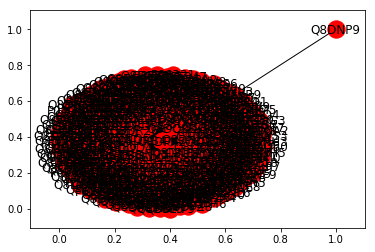

Q8DNV9
 ---- 

Liste des 1ers voisine:

Q8DRL6, Q8DPK2, Q8DQD4, Q8DNJ6, Q8DMY4, Q8DNB9, Q8DP78, Q8DNS5, Q59947, Q8DNS0, Q8DP70, Q8DRD4, Q8DPK9, Q8DN54, P62576, Q8DN51, Q8DQT7, Q8DN58, Q7CRB1, Q8CWQ5, Q8CYV1, Q8DPZ1, Q8DMY0, Q8DPZ6, Q8DRK4, Q8DQR9, Q8DPC7, Q8DQE6, Q8DQE5, Q8DQM2, Q8DQM1, Q8DQM0, Q8DNZ9, Q8DNA5, Q8DQ51, Q8DRJ1, Q8DN00, P0A4D8, Q8DNR5, Q8CYL4, Q8DNR6, Q8DNR9, Q8DRC5, Q8CZ55, Q8DR64, Q8DPS8, Q8DR60, Q8DR63, Q8DPS6, Q8DPS0, Q8DR68, Q8DN25, Q8DQI7, Q8DRJ2, Q8DQS9, Q8DNY9, Q8DP10, Q8DPJ6, Q8DNY1, Q8DPJ9, Q8DNY5, Q8CYG6, Q8DNQ4, Q8CWN6, P65537, Q8DRB7, P59206, Q8CWR6, Q8CZ65, P59200, Q8DNP4, Q8DPR1, Q8DPR0, Q8DQ85, Q8DNX4, Q8DRI9, Q8DQP4, Q8DRI0, Q8DRI1, Q8DPT2, Q8DP00, Q8DRA6, Q8CY81, Q8DQC8, Q8DPE4, Q8CYF8, Q8DRA8, Q8CWV3, Q8CWT3, Q8CWT2, Q8CWT6, Q8DNP9, Q8DRA5, Q8DQ25, P63743, Q8DNH1, Q8DRL8, Q8DP80, P66321, Q8DQQ8, Q8CYV9, Q8DP04, Q8DPW9, Q7CRB8, P0A452, Q8DN07, Q8DRH2, Q8DN05, Q8DRH4, Q8DNF9, Q8CY65, Q8DPD8, Q8DPH6, Q8DPD1, Q8DP31, Q8DPD2, Q8CYI8, P64063, Q8DQH6, Q8DN55, 

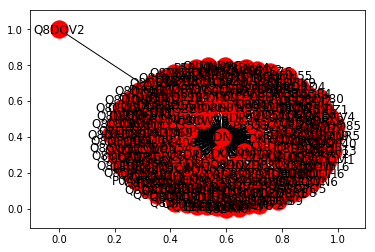

In [60]:
#range_list = np.linspace(float(2.51425e-20), float(2.51425e-02))
#print range_list
#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 40
#fig_size[1] = 40
#plt.rcParams["figure.figsize"] = fig_size

G = drawGraph(queryTopo)

#pos = nx.spring_layout(G,k=0.15,iterations=20)

#for limite in range_list:
    #filterGraph(G, limite)

limite = 2
drawGraph(queryTopo.queryTopo, limite)
QueryMatrix.blackList()

Identifiant R6 de touts les protéines R6 impliqué dans le divisome
Colorier ou annoter dans le graph des query les noeuds ( restreindre le gros graph a de petits graph: 
                                                       on prendra que les protéines
                                                      du divisome et leur premier voisin)

être capable d'élaguer le graph avec les e-values (numpy.range)
Toute les homologies paires impliquant au moins un homologue de Streptoccocus doit être retiré du graph
- Prendre le seui de e-value le plus tolérant possible, modifier ce seuil progressivement (numpy range) pour avoir 
le plus petit nombre de faux positif : diminuer la e-value maximal. Pour chaque e-value testé (chaque état du graph) 
    on compte le nombre d'intéraction strep strep connu qu'on est capable d'inférer dans le graph
   
        (vrai positif) / (vrai positif + faux negatif) = rappel (recall)
        (vrai positif) / (vrai positif + faux positif) = précision
        
        Prédicteur interactions Wikipédia
        
        Vrais positifs - Faux négatif
        Grille matplotlib 
 

Supprimer les ticks et les labels associés, supprimer le frame

Mettre un titre avec la e-value correspondante

Légende couleur

Organiser l'affichage en trouvant le bon pas (10 valeurs au départ)

Catégorie de noeuds (interactions expérimentals connu mais ne rapporte pas d'homologues chez R6)
A partir du moment qu'on a une arret qui soutienne une interaction entre streptoccocus, il faut qu'elle soit d'une autre couleur de l'arret

Rajout d'infos spécifiques au noeuds
E-Value pour décrire seuil de confiance pour une interaction (échelle, + petite à la + grande e-value = épaisseur de l'arret)
